In [0]:
import os
path = "(...)/ps1/src"
os.chdir(path)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import util
from linear_model import LinearModel

In [0]:
class LocallyWeightedLinearRegression(LinearModel):
    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.X = None
        self.y = None

    def fit(self, X, y):
        """Fit LWR by saving the training set"""
        self.X = X
        self.y = y

    def predict(self, X):
        """Make predictions given inputs x"""
        from numpy.linalg import inv, norm
        
        m, n = X.shape
        g = lambda X: np.exp(-(X**2)/(2*self.tau**2))
        
        # Compute w for each x
        w = g(norm(self.X[None]-X[:,None], axis=2))
        y_pred = np.zeros(m)  
        for i, W in enumerate(w):
            W = np.diag(W)
            theta = inv(self.X.T.dot(W).dot(self.X)).dot(self.X.T).dot(W).dot(self.y)           
            # make prediction
            y_pred[i] = X[i].dot(theta)
        return (y_pred)

Train: best tau=0.05, best mse=0.01240007615046851
Test: mse=0.016990143386890103


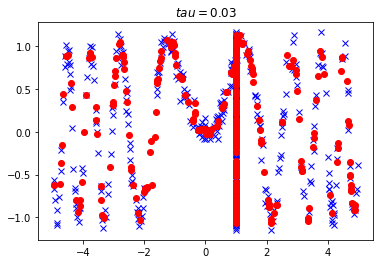

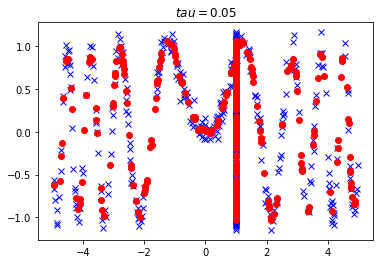

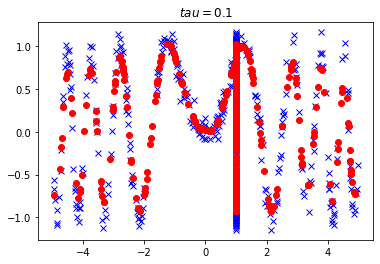

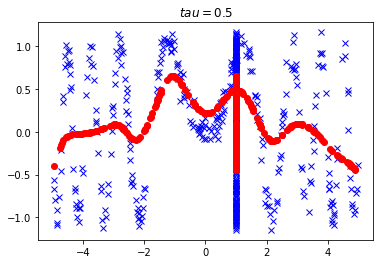

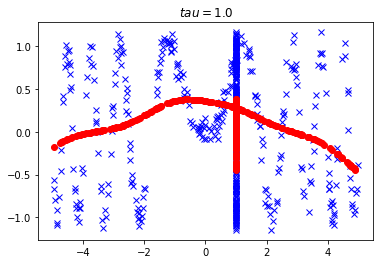

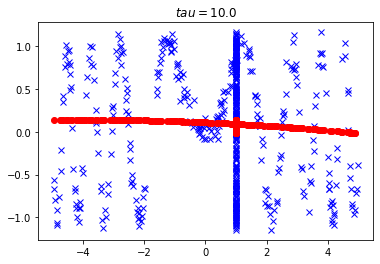

In [69]:
# Load training set
train_path = "(...)/ps1/data/ds5_train.csv"
eval_path = "(...)/ps1/data/ds5_valid.csv"
test_path = "(...)/ps1/data/ds5_test.csv"

X_train, y_train = util.load_dataset(train_path, add_intercept=True)
X_val, y_val = util.load_dataset(eval_path,  add_intercept=True)
X_test, y_test = util.load_dataset(test_path,  add_intercept=True)

tau_values = [0.03, 0.05, 0.1, 0.5, 1.0, 10.0]

# Search tau_values for the best tau (lowest MSE on the validation set)
best_tau = None
best_mse = float('inf')
for tau in tau_values:
    model = LocallyWeightedLinearRegression(tau)
    model.fit(X_train, y_train)

    y_pred= model.predict(X_val)
    mse = ((y_val - y_pred) ** 2).mean()
    
    # plot for each tau
    plt.figure()
    plt.title('$tau = {}$'.format(tau))
    plt.plot(X_train, y_train, 'bx')
    plt.plot(X_val, y_pred, 'ro')

    if mse < best_mse:
        best_mse = mse
        best_tau = tau

# Fit a LWR model with the best tau value
print('Train: best tau={}, best mse={}'.format(best_tau, best_mse))

model = LocallyWeightedLinearRegression(best_tau)
model.fit(X_train, y_train)

# Run on the test set to get the MSE value
y_pred = model.predict(X_test)
mse = ((y_test - y_pred) ** 2).mean()
print('Test: mse={}'.format(mse))